In [3]:
import pandas as pd

# Membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv("datasets/Mall_Customers.csv")

df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
# Ubah nama kolom
df = df.rename(columns= {'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# Ubah data ketegorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace = True)

# Tampilkan daya yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [9]:
from sklearn.cluster import KMeans

# Menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis = 1)

# Membuat list yang terisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

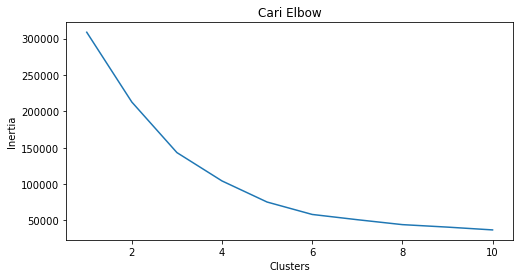

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat plot inertia
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title("Cari Elbow")
ax.set_xlabel('Clusters')
ax.set_ylabel("Inertia")

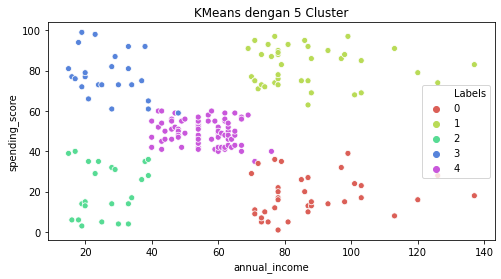

In [13]:
# Membuat objek KMeans
km5 = KMeans(n_clusters = 5).fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize = (8, 4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue = X['Labels'],
               palette = sns.color_palette('hls', 5))
plt.title("KMeans dengan 5 Cluster")
plt.show()